Load in relevant packages for this project

In [1]:
import statistics #Import statistics package
import pandas as pd #Import pandas as pd
import numpy as np #Import pandas as np
import matplotlib.pyplot as plt #import pyplot as plt
from math import exp #import exp for equations 
import sys #import sys for defining spaces later
import time #import time for setting date 
timestr = time.strftime("_%d_%Y_%B") #Set date in day_Year_Month format

## STANDARDS RUN 
Below established and known values should be imported using a Values.py file for comparison with measured values from the isotope analyzer instrument. The international standard values are fixed (e.g., VSMOW and SLAP), but the in-house standards and control waters you use within your own lab will chage over time as you generate more measurments. The .py file should consistently be updated over time as new measurements are made during Standards runs.

Examples of in-house waters included in this file would be MegaBoil and MissMT. 

In [2]:
from Values import *

Now load in raw standards data from the CRDS instrument

*** EDIT BASED ON LOCATION OF THE FILE ***

In [3]:
Standard_Data = pd.read_csv('/filename.csv',sep=',')
# Picarro Data from Standards run

*** END OF EDITING ***

Examine the column names

In [4]:
Standard_Data.columns #load column names

Index(['  Line', '  Analysis', '             Time Code', '           Port',
       '  Inj Nr', '  d(17_16)Mean', '  d(18_16)Mean', '    d(D_H)Mean',
       '      E17_Mean', '      H2O_Mean', '  Ignore', ' Good',
       '                            Identifier 1',
       '                            Identifier 2', '   Gas Configuration',
       'Timestamp Mean', '   d(17_16)_SD', '   d(18_16)_SD', '     d(D_H)_SD',
       '        E17_SD', '        H2O_SD', '   d(18_16)_Sl', '     d(D_H)_Sl',
       '        H2O_Sl', 'baseline_shift', '   slope_shift', '     residuals',
       'baseline_curvature', '      interval', '       ch4_ppm',
       '  h16od_adjust', '   h16od_shift', 'n2_flag', 'Resistance',
       '      DAS Temp', '      Tray', '  Sample', '     Job', '    Method',
       'Error Code', 'Pulse Good'],
      dtype='object')

The raw data from a the CRDS instrument (Picarro) has a lot of weird spacing issues that need to be cleaned up to make the process easier.

In [5]:
Standard_Data.columns=Standard_Data.columns.str.strip() #Remove all blank spaces from the column names

Now revisit the column names

In [6]:
Standard_Data.columns #load column names

Index(['Line', 'Analysis', 'Time Code', 'Port', 'Inj Nr', 'd(17_16)Mean',
       'd(18_16)Mean', 'd(D_H)Mean', 'E17_Mean', 'H2O_Mean', 'Ignore', 'Good',
       'Identifier 1', 'Identifier 2', 'Gas Configuration', 'Timestamp Mean',
       'd(17_16)_SD', 'd(18_16)_SD', 'd(D_H)_SD', 'E17_SD', 'H2O_SD',
       'd(18_16)_Sl', 'd(D_H)_Sl', 'H2O_Sl', 'baseline_shift', 'slope_shift',
       'residuals', 'baseline_curvature', 'interval', 'ch4_ppm',
       'h16od_adjust', 'h16od_shift', 'n2_flag', 'Resistance', 'DAS Temp',
       'Tray', 'Sample', 'Job', 'Method', 'Error Code', 'Pulse Good'],
      dtype='object')

Now the column names are clean which will make adjusting the data later in the process much easier. 

Now look at the data types for each variable

In [7]:
Standard_Data.info() #load the data type for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line                612 non-null    int64 
 1   Analysis            612 non-null    object
 2   Time Code           612 non-null    object
 3   Port                612 non-null    object
 4   Inj Nr              612 non-null    int64 
 5   d(17_16)Mean        612 non-null    object
 6   d(18_16)Mean        612 non-null    object
 7   d(D_H)Mean          612 non-null    object
 8   E17_Mean            612 non-null    object
 9   H2O_Mean            612 non-null    object
 10  Ignore              612 non-null    object
 11  Good                612 non-null    object
 12  Identifier 1        612 non-null    object
 13  Identifier 2        612 non-null    object
 14  Gas Configuration   612 non-null    object
 15  Timestamp Mean      612 non-null    object
 16  d(17_16)_SD         612 no

*** If data reads in the 'd(18_16)Mean', 'd(17_16)Mean', 'd(D_H)Mean', 'E17_Mean', and 'H2O_Mean' variables as non-intergers and with weird spaces, use the next two sections of code. Otherwise proceed to section 10 ***

Because of the weird formating of the raw data, Python is having a tough time reading the data correctly. Remove the spacing in the variables of interest and convert to numeric. 

In [8]:
Standard_Data['d(18_16)Mean'] = Standard_Data['d(18_16)Mean'].str.strip() #removing spacing
Standard_Data['d(17_16)Mean'] = Standard_Data['d(17_16)Mean'].str.strip() #removing spacing
Standard_Data['d(D_H)Mean'] = Standard_Data['d(D_H)Mean'].str.strip() #removing spacing
Standard_Data['E17_Mean'] = Standard_Data['E17_Mean'].str.strip() #removing spacing
Standard_Data['H2O_Mean'] = Standard_Data['H2O_Mean'].str.strip() #removing spacing

In [9]:
Standard_Data['d(18_16)Mean'] = pd.to_numeric(Standard_Data['d(18_16)Mean']) #convert to numeric
Standard_Data['d(17_16)Mean'] = pd.to_numeric(Standard_Data['d(17_16)Mean']) #convert to numeric
Standard_Data['d(D_H)Mean'] = pd.to_numeric(Standard_Data['d(D_H)Mean']) #convert to numeric
Standard_Data['E17_Mean'] = pd.to_numeric(Standard_Data['E17_Mean']) #convert to numeric
Standard_Data['H2O_Mean'] = pd.to_numeric(Standard_Data['H2O_Mean']) #convert to numeric

Now lets take another look at the data types for the variables of interest.

In [10]:
Standard_Data.info() #load the data type for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Line                612 non-null    int64  
 1   Analysis            612 non-null    object 
 2   Time Code           612 non-null    object 
 3   Port                612 non-null    object 
 4   Inj Nr              612 non-null    int64  
 5   d(17_16)Mean        611 non-null    float64
 6   d(18_16)Mean        611 non-null    float64
 7   d(D_H)Mean          611 non-null    float64
 8   E17_Mean            611 non-null    float64
 9   H2O_Mean            611 non-null    float64
 10  Ignore              612 non-null    object 
 11  Good                612 non-null    object 
 12  Identifier 1        612 non-null    object 
 13  Identifier 2        612 non-null    object 
 14  Gas Configuration   612 non-null    object 
 15  Timestamp Mean      612 non-null    object 
 16  d(17_16)

An important column in this dataset is 'Idenitifer 1'. This is where the user programs in the name of each sample. For clarity, rename this column to 'SampleName'. 

In [11]:
Standard_Data = Standard_Data.rename(columns={'Identifier 1':'SampleName'}) #Change name of Identifier 1 to SampleName'

View this column now

In [12]:
Standard_Data.SampleName #Load SampleName Column

0                                       DummyKD
1                                       DummyKD
2                                       DummyKD
3                                       DummyKD
4                                       DummyKD
                         ...                   
607                                        SLAP
608                                        SLAP
609                                        SLAP
610                                        SLAP
611                                        SLAP
Name: SampleName, Length: 612, dtype: object

Clearly this column still has the same spacing issue that needs to be corrected.

In [13]:
Standard_Data['SampleName'] = Standard_Data['SampleName'].str.strip() #removing spacing

Load the column once again

In [14]:
Standard_Data.SampleName #view column

0      DummyKD
1      DummyKD
2      DummyKD
3      DummyKD
4      DummyKD
        ...   
607       SLAP
608       SLAP
609       SLAP
610       SLAP
611       SLAP
Name: SampleName, Length: 612, dtype: object

Now the Sample Names are nice and neat. Now make a list of all the unique sample names.

In [15]:
Samples_List=pd.unique(Standard_Data["SampleName"]) #create list of unique items in the column 'SampleName'
Samples_List #View the array of unique sample names

array(['DummyKD', 'SuperBoil', 'UltraBoil', 'SupremeBoil', 'MegaBoil',
       'USGS50', 'Muley_Standard', 'Real_KD', 'VSMOW', 'USGS48',
       'DI_Water', 'DI_Seat', 'IceLava', 'SeatW', 'NM2', 'MissMT',
       'USGS47', 'USGS46.25', 'UGSG46.5', 'USGS46.75', 'USGS46',
       'SLAP.25', 'SLAP.5', 'SLAP.75', 'SLAP'], dtype=object)

Using this array of unique sample names, now a data dictionary can be created that contains the dataframes for each sample assessed during the analysis run

In [16]:
Samples_Dictionary = {elem : pd.DataFrame() for elem in Samples_List} #Define data dictionary based on Sample Names array

for key in Samples_Dictionary.keys():
    Samples_Dictionary[key] = Standard_Data[:][Standard_Data.SampleName == key] 
    #generate function that adds a dataframe for each element in the array

The function has successfull generated a data dictionary with all the samples.

To correct data, two internationally accepted water standards will be used:
Vienna Standard Mean Ocean Water - VSMOW
Standard Light Antarctic Precipitation Water - SLAP

Before generating correction equations, the dataframes related to SLAP and VSMOW need to be cleaned.

To demonstrate, look at the d18O values for SLAP based on the injection number

Text(0, 0.5, 'd18O value')

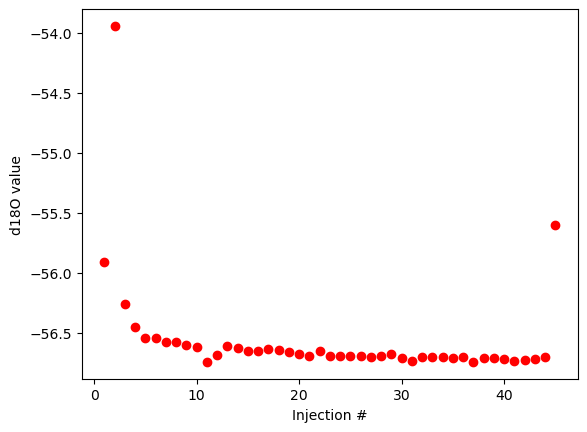

In [17]:
plt.plot(Samples_Dictionary['SLAP']['Inj Nr'], Samples_Dictionary['SLAP']['d(18_16)Mean'], 'ro') #set plot parameters
plt.xlabel('Injection #') #label x axis
plt.ylabel('d18O value') #label y axis

As this plot demonstrates, a large portion of these injections should be removed to create a tighter window.

To do this, a function will generate a mean and standard deviation.

A cutoff will then be determined based on the desired number of standard deviations to retain (adjustable "STD_VALUE" below)

A lower and upper cutoff line will then be calculated based on the mean +/- the cutoff.

All values below the lower cutoff line and above the upper cutoff line will be removed.

The function will cycle through twice for VSMOW and three times for SLAP (because this sample has more injections) to remove the initial outliers and then to truly clean the data.

In [18]:
STD_VALUE= 1 #set the # of standard deviations you would like to use for a cutoff

for i in range(2):
    VSMOW_mean= np.mean(Samples_Dictionary['VSMOW']['d(18_16)Mean']) #Generate mean for VSMOW
    VSMOW_std = np.std(Samples_Dictionary['VSMOW']['d(18_16)Mean']) #Generate standard deviation value for VSMOW
    VSMOW_cutoff = VSMOW_std * STD_VALUE #Determine cutoff based on # of standard deviations desired
    VSMOW_lower, VSMOW_upper = VSMOW_mean - VSMOW_cutoff, VSMOW_mean + VSMOW_cutoff #set upper and lower cutoff lines
    VSMOW_condition= ~((Samples_Dictionary['VSMOW']['d(18_16)Mean'] < (VSMOW_mean - VSMOW_cutoff)) | (Samples_Dictionary['VSMOW']['d(18_16)Mean'] > (VSMOW_mean + VSMOW_cutoff)))
    #Create the conditions to apply to VSMOW
    VSMOW_Clean = Samples_Dictionary['VSMOW'][VSMOW_condition] #Apply conditions to VSMOW
    Samples_Dictionary['VSMOW']=VSMOW_Clean #Update VSMOW based on cleaned version

In [19]:
for i in range(3):
    SLAP_mean= np.mean(Samples_Dictionary['SLAP']['d(18_16)Mean']) #Generate mean for SLAP
    SLAP_std = np.std(Samples_Dictionary['SLAP']['d(18_16)Mean']) ##Generate standard deviation value for SLAP
    SLAP_cutoff = SLAP_std * STD_VALUE  #Determine cutoff based on # of standard deviations desired
    SLAP_lower, SLAP_upper = SLAP_mean - SLAP_cutoff, SLAP_mean + SLAP_cutoff #set upper and lower cutoff lines
    SLAP_condition= ~((Samples_Dictionary['SLAP']['d(18_16)Mean'] < (SLAP_mean - SLAP_cutoff)) | (Samples_Dictionary['SLAP']['d(18_16)Mean'] > (SLAP_mean + SLAP_cutoff)))
    #Create the conditions to apply to SLAP
    SLAP_Clean = Samples_Dictionary['SLAP'][SLAP_condition] #Apply conditions to SLAP
    Samples_Dictionary['SLAP']=SLAP_Clean #Update SLAP based on cleaned version

Now revisit the plot from before for SLAP

Text(0, 0.5, 'd18O value')

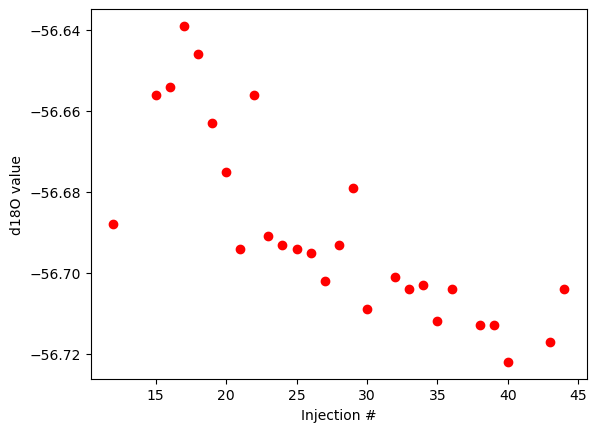

In [20]:
plt.plot(Samples_Dictionary['SLAP']['Inj Nr'], Samples_Dictionary['SLAP']['d(18_16)Mean'], 'ro') #set plot parameters
plt.xlabel('Injection #') #label x axis
plt.ylabel('d18O value') #label y axis

The function has removed the injections that are likely biased by the memory effect of previous measurements resulting in a tight window. 

Look at the VSMOW dataframe as well to confirm that this has removed unwanted injections.

In [21]:
Samples_Dictionary['VSMOW'] #load VSMOW dataframe

,Line,Analysis,Time Code,Port,Inj Nr,d(17_16)Mean,d(18_16)Mean,d(D_H)Mean,E17_Mean,H2O_Mean,...,h16od_shift,n2_flag,Resistance,DAS Temp,Tray,Sample,Job,Method,Error Code,Pulse Good
217,218,P-2402,2023/01/27 22:49:56,1-09,3,-0.194,-0.760,2.263,0.207,19835.0,...,0.0000,0,\n21.76,41.312,1,9,2,WassenaarRS,0,1
218,219,P-2402,2023/01/27 22:58:55,1-09,4,-0.202,-0.746,2.271,0.192,19957.0,...,0.0000,0,\n21.70,41.375,1,9,2,WassenaarRS,0,1
220,221,P-2402,2023/01/27 23:16:54,1-09,6,-0.199,-0.757,2.340,0.201,19854.0,...,-0.0000,0,\n21.77,42.062,1,9,2,WassenaarRS,0,1
221,222,P-2402,2023/01/27 23:25:53,1-09,7,-0.199,-0.756,2.443,0.200,20040.0,...,-0.0000,0,\n21.80,41.625,1,9,2,WassenaarRS,0,1
222,223,P-2402,2023/01/27 23:34:52,1-09,8,-0.174,-0.749,2.342,0.222,19778.0,...,-0.0000,0,\n21.85,41.375,1,9,2,WassenaarRS,0,1
224,225,P-2402,2023/01/27 23:52:51,1-09,10,-0.176,-0.745,2.369,0.218,20585.0,...,-0.0000,0,\n21.92,42.188,1,9,2,WassenaarRS,0,1
225,226,P-2402,2023/01/28 00:01:51,1-09,11,-0.194,-0.739,2.469,0.196,19802.0,...,-0.0000,0,\n21.86,42.375,1,9,2,WassenaarRS,0,1
233,234,P-2402,2023/01/28 01:13:49,1-09,19,-0.164,-0.749,2.403,0.232,20319.0,...,-0.0000,0,\n21.93,41.875,1,9,2,WassenaarRS,0,1
234,235,P-2402,2023/01/28 01:22:48,1-09,20,-0.200,-0.756,2.454,0.199,20322.0,...,0.0000,0,\n21.88,42.250,1,9,2,WassenaarRS,0,1


Now both VSMOW and SLAP have been cleaned and can be used to create correction equations. 

To do this, a stretching and offset value will be generated for both d17O and d18O. These equations will be used to correct both the raw d17O and d18O values obtained from the isotope analyzer instrument. 

E17O can then be corrected using these corrected d17O and d18O values


To begin, determine the stretching value for d18O. 

This is determined by generating a change value for the raw measurments of SLAP and VSMOW

And by generating a change value for the known values of SLAP and VSMOW.

The known change value is then divided by the raw change value.

In [22]:
#Generate raw change value
Raw_d18O_Change = (np.mean(Samples_Dictionary['SLAP']['d(18_16)Mean']) - np.mean(Samples_Dictionary['VSMOW']['d(18_16)Mean']))
Known_d18O_Change = SLAP_d18 - VSMOW_d18 #Generate known change value
d18O_stretch = Known_d18O_Change/Raw_d18O_Change #Divide known by raw change value
d18O_stretch #View stretching value

0.9921547933623288

Each raw value will be multiplied by this stretching value. However, an offset value still needs to be obtained. 

The offset is determined by subtracting the raw value * stretching value from the known value for both VSMOW and SLAP and then averaging these values together. 

In [23]:
d18O_SLAP_Offset = SLAP_d18 - (np.mean(Samples_Dictionary['SLAP']['d(18_16)Mean']) * d18O_stretch) #SLAP offset value
d18O_VSMOW_Offset = VSMOW_d18 - (np.mean(Samples_Dictionary['VSMOW']['d(18_16)Mean']) * d18O_stretch) #VSMOW offset value
d18O_Offset = (d18O_SLAP_Offset+d18O_VSMOW_Offset)/2 #Add SLAP and VSMOW offset together and divide by 2
d18O_Offset

0.744887770972137

This offset value will be added to the product of (raw value * stretching value) 

As such, the final equation looks like: y = (raw value * stretching value) + offset

When simplified, this is essentially just a *y=mx+b equation*, with y representing the corrected value. 

Define a function based on the obtained d18O stretching and offset values. This will be used to correct all raw values later.

In [24]:
def d18O_amended(x):
    return((d18O_stretch*x)+d18O_Offset) #function to correct raw d18O values

Now that a correction equation has been determined for d18O, an equation needs to be determined for d17O

The format for generating a d17O correction is slightly different because d17O values are less certain except for VSMOW

Therefore, a backcalculation using d18O and E17O is applied to obtain a d17O approximate value for SLAP

In [25]:
SLAP_Lin_d17O= (SLAP_E17)+(0.528*(1000*np.log((SLAP_d18/1000)+1))) #back calculate to determine approx linearized SLAP d17O
SLAP_Approx_d17O = 1000*(exp(SLAP_Lin_d17O/1000)-1) #determine approximate d17O from approx linearized SLAP d17O
SLAP_Approx_d17O #view approx SLAP d17O value

-29.696800000183266

Now this approximated d17O value can be used to calculate the stretching and offset values in the same manner as the d18O approach

In [26]:
#Generate raw change value
Raw_d17O_Change = (np.mean(Samples_Dictionary['SLAP']['d(17_16)Mean']) - np.mean(Samples_Dictionary['VSMOW']['d(17_16)Mean']))
Known_d17O_Change = SLAP_Approx_d17O - VSMOW_d17 #Generate known change value
d17O_stretch = Known_d17O_Change/Raw_d17O_Change #Divide known by raw change value
d17O_stretch #View stretching value

0.981623458670348

In [27]:
d17O_SLAP_Offset = SLAP_Approx_d17O - (np.mean(Samples_Dictionary['SLAP']['d(17_16)Mean']) * d17O_stretch) #SLAP offset value
d17O_VSMOW_Offset = VSMOW_d17 - (np.mean(Samples_Dictionary['VSMOW']['d(17_16)Mean']) * d17O_stretch) #VSMOW offset value
d17O_Offset = (d17O_SLAP_Offset+d17O_VSMOW_Offset)/2  #Add SLAP and VSMOW offset together and divide by 2
d17O_Offset

0.1856359029618811

In [28]:
def d17O_amended(x):
    return((d17O_stretch*x)+d17O_Offset) #function to correct raw d17O values

Now there's a d17O and d18O correction equation

Now create a function that uses the corrected d17O and d18O values to determine a corrected E17O value

In [29]:
def E17O_amended(x,y):
    return(((((1000*np.log((x/1000)+1))))-(0.528*(1000*np.log((y/1000)+1)))))
#function to determine corrected E17O value from corrected d17O and d18O

First correct all d18O values in the data dictionary

In [30]:
for x in Samples_List:
    Samples_Dictionary[x]['d18O_amended']=d18O_amended(Samples_Dictionary[x]['d(18_16)Mean'])
# apply d18O correction function to all raw d18O values in data dictionary

Now do the same for d17O

In [31]:
for x in Samples_List:
    Samples_Dictionary[x]['d17O_amended']=d17O_amended(Samples_Dictionary[x]['d(17_16)Mean'])
# apply d17O correction function to all raw d17O values in data dictionary

Now can correct E17O with both d17O and d18O corrected

In [32]:
for x in Samples_List:
    Samples_Dictionary[x]['E17O_amended']=E17O_amended(Samples_Dictionary[x]['d17O_amended'], Samples_Dictionary[x]['d18O_amended'])
    # apply E17O correction function using corrected d17O and d18O

At this point it's important to check E17O values to make sure they look accurate and standard deviations aren't too big

In [33]:
for x in Samples_List:
    print(x,np.mean(Samples_Dictionary[x]['E17O_amended'])) #function to look at all samples E17O value

DummyKD -0.009933880202234091
SuperBoil 0.010425661691859859
UltraBoil 0.009478219349984822
SupremeBoil -0.004093809076932109
MegaBoil -0.011899255844579393
USGS50 -0.00801979038302969
Muley_Standard -0.13154669157991072
Real_KD 0.0021379403192108813
VSMOW -7.249104023150501e-08
USGS48 0.039550844855707076
DI_Water 0.0250643374319661
DI_Seat 0.02959915283007396
IceLava 0.0334053218968986
SeatW 0.032864763293446626
NM2 0.029121682068332072
MissMT 0.03451823888127017
USGS47 0.04140416075108085
USGS46.25 0.022120417921034363
UGSG46.5 0.027443400822892833
USGS46.75 0.024740003042310093
USGS46 0.026868801643845995
SLAP.25 0.00016315550777612486
SLAP.5 -0.010373932229207425
SLAP.75 -0.013049177609905094
SLAP 0.001905582183767191


In [34]:
for x in Samples_List:
    print(x,np.std(Samples_Dictionary[x]['E17O_amended']))  #function to look at all samples E17O standard deviation value

DummyKD 0.015074820549917982
SuperBoil 0.014035680037711693
UltraBoil 0.013012896998499533
SupremeBoil 0.015301809099854818
MegaBoil 0.013500131899288078
USGS50 0.01241853593565841
Muley_Standard 0.013963960110248001
Real_KD 0.010479237277726533
VSMOW 0.012275184783964067
USGS48 0.017837250034620458
DI_Water 0.015900427501118735
DI_Seat 0.014886428303442513
IceLava 0.017080431296984173
SeatW 0.013334831508457887
NM2 0.012062491359436735
MissMT 0.015588865983646874
USGS47 0.011659357836218789
USGS46.25 0.01096868746960694
UGSG46.5 0.012119376201573016
USGS46.75 0.012441903927283846
USGS46 0.011819656587547833
SLAP.25 0.01301548068274334
SLAP.5 0.011816390468300396
SLAP.75 0.011572825187256101
SLAP 0.0168008901783509


If E17O values and standard deviations look correct, then at this point individual csv files should be exported for each sample before proceeding to make further adjustments.

This is critical because many columns will be removed in the proceeding steps and it may be necessary to examine these columns down the road.

*** EDIT THE FOLLOWING LINES BASED ON THE LOCATION YOU'D LIKE TO EXPORT CSV FILES ***

In [35]:
for x in Samples_List:
    Samples_Dictionary[x].to_csv('/filename'+str(x)+timestr+'.csv', sep=',') 
    #function that exports each sample data as an individual dataframe with the date in day_year_month format

*** END OF EDITING ***

At this point, only the 2 standards (VSMOW and SLAP) have been cleaned. All the other samples should go through the same cutoff process described above based based on their means and standard deviations.

Before doing this, a new list should be created without VSMOW and SLAP so that it can be applied to functions.

In [36]:
Samples_List_B = list(Samples_List)
Samples_List_B.remove('VSMOW')
Samples_List_B.remove('SLAP')

Now the same function used earlier will be applied to the remaining samples. 

Remember to change the number of standard deviations ('STD_VALUE') based on the desired tightness of the window of remaining measurments.

In [37]:
STD_VALUE= 1 #determine the # of standard deviations to use for the cutoff

for x in Samples_List_B:
    for i in range(2):
        mean= np.mean(Samples_Dictionary[x]['d(18_16)Mean'])
        std = np.std(Samples_Dictionary[x]['d(18_16)Mean'])
        cutoff = std * STD_VALUE
        lower, upper = mean - cutoff, mean + cutoff
        condition= ~((Samples_Dictionary[x]['d(18_16)Mean'] < (mean - cutoff)) | (Samples_Dictionary[x]['d(18_16)Mean'] > (mean + cutoff)))
        Clean = Samples_Dictionary[x][condition]
        Samples_Dictionary[x]=Clean

Now revisit E17O and standard deviation values to see how they've changed.

In [38]:
for x in Samples_List:
    print(x,np.mean(Samples_Dictionary[x]['E17O_amended'])) #function to view E17O mean values for all samples

DummyKD -0.013063486665377893
SuperBoil 0.0021226080861172316
UltraBoil 0.006042382759448434
SupremeBoil 9.38789206536228e-05
MegaBoil -0.013906813694015594
USGS50 -0.005892914326950705
Muley_Standard -0.12847865613943857
Real_KD 0.002183860800762702
VSMOW -7.249104023150501e-08
USGS48 0.04016086214801965
DI_Water 0.026027884173496378
DI_Seat 0.027519643400820727
IceLava 0.034503938104789626
SeatW 0.03558868570278182
NM2 0.028412874159665914
MissMT 0.036165463956748474
USGS47 0.0391920883830732
USGS46.25 0.023175797337555794
UGSG46.5 0.03241479371923996
USGS46.75 0.02669730224454625
USGS46 0.024959044972582885
SLAP.25 -0.0006355207112406447
SLAP.5 -0.010231083572942978
SLAP.75 -0.01001776051558707
SLAP 0.001905582183767191


In [39]:
for x in Samples_List:
    print(x,np.std(Samples_Dictionary[x]['E17O_amended'])) #function to view standard deviation values for all samples

DummyKD 0.013813505554421986
SuperBoil 0.014652250567650517
UltraBoil 0.01282811381871331
SupremeBoil 0.014489005535072166
MegaBoil 0.013862455722626317
USGS50 0.013296391437695548
Muley_Standard 0.013424475760227927
Real_KD 0.009505498118179717
VSMOW 0.012275184783964067
USGS48 0.016806349541875765
DI_Water 0.013631628172316914
DI_Seat 0.014600630166730914
IceLava 0.018274342301771274
SeatW 0.012996642811141396
NM2 0.0119327550976588
MissMT 0.01569368831639931
USGS47 0.010116089126810527
USGS46.25 0.009830711974197725
UGSG46.5 0.012680562396021144
USGS46.75 0.013247110778861084
USGS46 0.011279439244902734
SLAP.25 0.013946096786618085
SLAP.5 0.010366002823593344
SLAP.75 0.009995254547711493
SLAP 0.0168008901783509


*** EDIT THESE NEXT LINES *** 

At this point remove any samples that aren't needed for the final dataset by adding them to the remove code below.

These will typically be 'conditioning vials' that are simply used to maneuver from one sample to another (e.g., a conditioning vial with a d18O value of 10 might be placed between two control vials with d18O values of 7 and 13).

In [40]:
Final_Samples_List = list(Samples_List) #generate new Final version list
Final_Samples_List.remove('DummyKD') #remove this sample
Final_Samples_List.remove('SuperBoil') #remove this sample
Final_Samples_List.remove('UltraBoil') #remove this sample
Final_Samples_List.remove('USGS46.25') #remove this sample
Final_Samples_List.remove('UGSG46.5') #remove this sample
Final_Samples_List.remove('USGS46.75') #remove this sample
Final_Samples_List.remove('SLAP.25') #remove this sample
Final_Samples_List.remove('SLAP.5') #remove this sample
Final_Samples_List.remove('SLAP.75') #remove this sample

*** END OF LINES THAT NEED TO BE EDITED ***

As long as nothing looks off or unusual, now proceed to remove all columns except those critical to oxygen and hydrogen analysis

In [41]:
for x in Final_Samples_List:
    Samples_Dictionary[x]['_']= "" #Add blank column
    Samples_Dictionary[x]['__']= "" #Add blank column
    Samples_Dictionary[x]['___']= "" #Add blank column
    Samples_Dictionary[x]['____']= "" #Add blank column
    Samples_Dictionary[x]=Samples_Dictionary[x][['Inj Nr','d(17_16)Mean','d17O_amended','_',
                                                       'd(18_16)Mean','d18O_amended','__','d(D_H)Mean','___',
                                                       'E17_Mean','E17O_amended','____',"H2O_Mean"]].copy()
    #This last portion of the function creates a new version of the data dictionary with only the necessary columns and 
    #adds spaces between sections to make the dataframes easier to read

Now proceed to generate means, standard deviations, and comparisons with known/established values for all important columns

In [42]:
for x in Final_Samples_List:
    #Create new row based on the mean values
    row_1=['','',np.mean(Samples_Dictionary[x]['d17O_amended']),'','',
           np.mean(Samples_Dictionary[x]['d18O_amended']),'','','','',
           np.mean(Samples_Dictionary[x]['E17O_amended']),'',np.mean(Samples_Dictionary[x]['H2O_Mean'])]
    #Create new row based on the standard deviations
    row_2=['','',np.std(Samples_Dictionary[x]['d17O_amended']),'','',np.std(Samples_Dictionary[x]['d18O_amended']),'','',
           '','',np.std(Samples_Dictionary[x]['E17O_amended']),'',np.std(Samples_Dictionary[x]['H2O_Mean'])]
    #Create new row based on the difference between measured and know/established values
    row_3=['','',(pd.to_numeric(eval(x+'_d17')) - np.mean(Samples_Dictionary[x]['d17O_amended'])),'','',
        (pd.to_numeric(eval(x+'_d18')) - np.mean(Samples_Dictionary[x]['d18O_amended'])),'','',
        '','',(pd.to_numeric(eval(x+'_E17')) - np.mean(Samples_Dictionary[x]['E17O_amended'])),'','',]
    Samples_Dictionary[x].loc['MEAN']=row_1 #add row 1 to end of dataframe
    Samples_Dictionary[x].loc['STD']=row_2 #add row 2 to end of dataframe
    Samples_Dictionary[x].loc['DIFFERENCE FROM KNOWN/ESTABLISHED']=row_3 #add row 3 to end of dataframe

Now all dataframes are finalized. At this point the files are ready to be exported in a clean excel spreadsheet that contains each sample as a different sheet

*** EDIT FOLLOWING LINES TO DICTATE WHERE TO EXPORT XLSX FILE TO ***

In [43]:
with pd.ExcelWriter("/filename"+timestr+".xlsx") as writer:
    for x in Final_Samples_List:
        Samples_Dictionary[x].to_excel(writer, sheet_name=""+str(x)+"")
        # Generates an excel spreadsheet in the specified location and adds a sheet for each sample 

*** END OF EDITING ***


## Analysis Run

Now that the values have been generated from the standards run, these will be used for the next several analysis runs until another standards run is necessary. Since VSMOW and SLAP are expensive and only available in limited supplies, in-house water standards should be used for correcting values during analysis runs.

The first thing to do is to update all the values of the established waters:

In [44]:
# Remove final mean,std etc. rows because these will bias means
for x in Final_Samples_List:
    Samples_Dictionary[x]=Samples_Dictionary[x].drop('DIFFERENCE FROM KNOWN/ESTABLISHED')
    Samples_Dictionary[x]=Samples_Dictionary[x].drop('MEAN')
    Samples_Dictionary[x]=Samples_Dictionary[x].drop('STD')
this = sys.modules[__name__] # this is now your current namespace
#Generate function that creates new variables based on the values obtained during the standards run
for x in Final_Samples_List:
    setattr(this,'d17O_%s' % x, np.mean(Samples_Dictionary[x]['d17O_amended']))
    setattr(this,'d18O_%s' % x, np.mean(Samples_Dictionary[x]['d18O_amended']))
    setattr(this,'E17O_%s' % x, np.mean(Samples_Dictionary[x]['E17O_amended']))

Now load in raw data from analysis run

*** EDIT BASED ON LOCATION OF THE FILE ***

In [45]:
Analysis_Data = pd.read_csv('/filename.csv',sep=',')
# Load analysis data from 03-Feb-2023 Analysis Run

The next several lines should repeat from the standards run process as the raw data needs to be cleaned/organized in the same way

## CODE REPEATS FROM STDS RUN UNTIL SECTION 58

In [46]:
Analysis_Data.columns #load column names

Index(['  Line', '  Analysis', '             Time Code', '           Port',
       '  Inj Nr', '  d(17_16)Mean', '  d(18_16)Mean', '    d(D_H)Mean',
       '      E17_Mean', '      H2O_Mean', '  Ignore', ' Good',
       '                            Identifier 1',
       '                            Identifier 2', '   Gas Configuration',
       'Timestamp Mean', '   d(17_16)_SD', '   d(18_16)_SD', '     d(D_H)_SD',
       '        E17_SD', '        H2O_SD', '   d(18_16)_Sl', '     d(D_H)_Sl',
       '        H2O_Sl', 'baseline_shift', '   slope_shift', '     residuals',
       'baseline_curvature', '      interval', '       ch4_ppm',
       '  h16od_adjust', '   h16od_shift', 'n2_flag', 'Resistance',
       '      DAS Temp', '      Tray', '  Sample', '     Job', '    Method',
       'Error Code', 'Pulse Good'],
      dtype='object')

In [47]:
Analysis_Data.columns=Analysis_Data.columns.str.strip() #Remove all blank spaces from the column names

In [48]:
Analysis_Data.columns #load column names

Index(['Line', 'Analysis', 'Time Code', 'Port', 'Inj Nr', 'd(17_16)Mean',
       'd(18_16)Mean', 'd(D_H)Mean', 'E17_Mean', 'H2O_Mean', 'Ignore', 'Good',
       'Identifier 1', 'Identifier 2', 'Gas Configuration', 'Timestamp Mean',
       'd(17_16)_SD', 'd(18_16)_SD', 'd(D_H)_SD', 'E17_SD', 'H2O_SD',
       'd(18_16)_Sl', 'd(D_H)_Sl', 'H2O_Sl', 'baseline_shift', 'slope_shift',
       'residuals', 'baseline_curvature', 'interval', 'ch4_ppm',
       'h16od_adjust', 'h16od_shift', 'n2_flag', 'Resistance', 'DAS Temp',
       'Tray', 'Sample', 'Job', 'Method', 'Error Code', 'Pulse Good'],
      dtype='object')

In [49]:
Analysis_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line                496 non-null    int64 
 1   Analysis            496 non-null    object
 2   Time Code           496 non-null    object
 3   Port                496 non-null    object
 4   Inj Nr              496 non-null    int64 
 5   d(17_16)Mean        496 non-null    object
 6   d(18_16)Mean        496 non-null    object
 7   d(D_H)Mean          496 non-null    object
 8   E17_Mean            496 non-null    object
 9   H2O_Mean            496 non-null    object
 10  Ignore              496 non-null    object
 11  Good                496 non-null    object
 12  Identifier 1        496 non-null    object
 13  Identifier 2        496 non-null    object
 14  Gas Configuration   496 non-null    object
 15  Timestamp Mean      496 non-null    object
 16  d(17_16)_SD         496 no

In [50]:
Analysis_Data['d(18_16)Mean'] = Analysis_Data['d(18_16)Mean'].str.strip() #removing spacing
Analysis_Data['d(17_16)Mean'] = Analysis_Data['d(17_16)Mean'].str.strip() #removing spacing
Analysis_Data['d(D_H)Mean'] = Analysis_Data['d(D_H)Mean'].str.strip() #removing spacing
Analysis_Data['E17_Mean'] = Analysis_Data['E17_Mean'].str.strip() #removing spacing
Analysis_Data['H2O_Mean'] = Analysis_Data['H2O_Mean'].str.strip() #removing spacing

In [51]:
Analysis_Data['d(18_16)Mean'] = pd.to_numeric(Analysis_Data['d(18_16)Mean']) #convert to numeric
Analysis_Data['d(17_16)Mean'] = pd.to_numeric(Analysis_Data['d(17_16)Mean']) #convert to numeric
Analysis_Data['d(D_H)Mean'] = pd.to_numeric(Analysis_Data['d(D_H)Mean']) #convert to numeric
Analysis_Data['E17_Mean'] = pd.to_numeric(Analysis_Data['E17_Mean']) #convert to numeric
Analysis_Data['H2O_Mean'] = pd.to_numeric(Analysis_Data['H2O_Mean']) #convert to numeric

In [52]:
Analysis_Data.info() #load the data type for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Line                496 non-null    int64  
 1   Analysis            496 non-null    object 
 2   Time Code           496 non-null    object 
 3   Port                496 non-null    object 
 4   Inj Nr              496 non-null    int64  
 5   d(17_16)Mean        494 non-null    float64
 6   d(18_16)Mean        494 non-null    float64
 7   d(D_H)Mean          494 non-null    float64
 8   E17_Mean            494 non-null    float64
 9   H2O_Mean            494 non-null    float64
 10  Ignore              496 non-null    object 
 11  Good                496 non-null    object 
 12  Identifier 1        496 non-null    object 
 13  Identifier 2        496 non-null    object 
 14  Gas Configuration   496 non-null    object 
 15  Timestamp Mean      496 non-null    object 
 16  d(17_16)

In [53]:
Analysis_Data = Analysis_Data.rename(columns={'Identifier 1':'SampleName'}) #Change name of Identifier 1 to SampleName'

In [54]:
Analysis_Data.SampleName #Load SampleName Column

0                                       DummyKD
1                                       DummyKD
2                                       DummyKD
3                                       DummyKD
4                                       DummyKD
                         ...                   
491                                      USGS47
492                                      USGS47
493                                      USGS47
494                                      USGS47
495                                      USGS47
Name: SampleName, Length: 496, dtype: object

In [55]:
Analysis_Data['SampleName'] = Analysis_Data['SampleName'].str.strip() #removing spacing

In [56]:
Analysis_Samples_List=pd.unique(Analysis_Data["SampleName"]) #create list of unique items in the column 'SampleName'
Analysis_Samples_List #View the array of unique sample names

array(['DummyKD', 'SuperBoil', 'UltraBoil', 'SupremeBoil', 'MegaBoil',
       'USGS50', 'Muley_Standard', 'Real_KD', 'USGS48', 'DI_Water',
       'C1118_01', 'C1111_01', 'C1111_04', 'C1111_08', 'DI_Seat',
       'IceLava', 'NM2', 'MissMT', 'MissMT_Test_01', 'MissMT_Test_02',
       'MissMT_Test_03', 'USGS47'], dtype=object)

In [57]:
Anlys_Samples_Dictionary = {elem : pd.DataFrame() for elem in Analysis_Samples_List} #Define data dictionary based on Sample Names array

for key in Anlys_Samples_Dictionary.keys():
    Anlys_Samples_Dictionary[key] = Analysis_Data[:][Analysis_Data.SampleName == key] 
    #generate function that adds a dataframe for each element in the array

## RETURN HERE


Now the analysis data has been generated into a data dictionary with all the samples in the same way the standards run was.

To correct analysis data, in-house water standards are used. The next lines should be adjusted based on the in-house water standards the lab is using. In-house water standards should cover a wide enough range of values to encapsulate all unknown samples analyzed in the analysis run.

USGS50 and USGS47 will be used as in-house standards in the following code but these should be edited depending on what standards the lab selects.

*** EDIT THE FOLLOWING LINES BASED ON THE IN-HOUSE STANDARDS SELECTED BY THE LAB ***

In [58]:
# Remove outliers and injections impacted by memory effect for both in-house standards
STD_VALUE=1
for i in range(2):
        mean= np.mean(Anlys_Samples_Dictionary['USGS50']['d(18_16)Mean'])
        std = np.std(Anlys_Samples_Dictionary['USGS50']['d(18_16)Mean'])
        cutoff = std * STD_VALUE
        lower, upper = mean - cutoff, mean + cutoff
        condition= ~((Anlys_Samples_Dictionary['USGS50']['d(18_16)Mean'] < (mean - cutoff)) | (Anlys_Samples_Dictionary['USGS50']['d(18_16)Mean'] > (mean + cutoff)))
        Clean = Anlys_Samples_Dictionary['USGS50'][condition]
        Anlys_Samples_Dictionary['USGS50']=Clean
        
for i in range(2):
        mean= np.mean(Anlys_Samples_Dictionary['USGS47']['d(18_16)Mean'])
        std = np.std(Anlys_Samples_Dictionary['USGS47']['d(18_16)Mean'])
        cutoff = std * STD_VALUE
        lower, upper = mean - cutoff, mean + cutoff
        condition= ~((Anlys_Samples_Dictionary['USGS47']['d(18_16)Mean'] < (mean - cutoff)) | (Anlys_Samples_Dictionary['USGS47']['d(18_16)Mean'] > (mean + cutoff)))
        Clean = Anlys_Samples_Dictionary['USGS47'][condition]
        Anlys_Samples_Dictionary['USGS47']=Clean

Now both in-house standards have been cleaned and can be used to create correction equations. 

To do this, a stretching and offset value will be generated for both d17O and d18O. These equations will be used to correct both the raw d17O and d18O values obtained from the isotope analyzer instrument. 

E17O can then be corrected using these corrected d17O and d18O values

To begin, determine the stretching value for d18O. 

This is determined by generating a change value for the raw measurments of both in-house standards

And by generating a change value for the known values of both in-house standards.

The known change value is then divided by the raw change value.

In [59]:
#Generate raw change value *EDIT THIS LINE*
Raw_d18O_Change = (np.mean(Anlys_Samples_Dictionary['USGS47']['d(18_16)Mean']) - np.mean(Anlys_Samples_Dictionary['USGS50']['d(18_16)Mean']))
Known_d18O_Change = d18O_USGS47 - d18O_USGS50 #Generate known change value *EDIT THIS LINE*
d18O_stretch = Known_d18O_Change/Raw_d18O_Change #Divide known by raw change value
d18O_stretch #View stretching value

0.9954001102209005

Each raw value will be multiplied by this stretching value. However, an offset value still needs to be obtained. 

The offset is determined by subtracting the raw value * stretching value from the known value for both in-house standards and then averaging these values together. 

In [60]:
#in-house std 1 offset value *EDIT THIS LINE*
d18O_InHS_Std1_Offset = d18O_USGS47 - (np.mean(Anlys_Samples_Dictionary['USGS47']['d(18_16)Mean']) * d18O_stretch)
#in-house std 2 offset value *EDIT THIS LINE*
d18O_InHS_Std2_Offset = d18O_USGS50 - (np.mean(Anlys_Samples_Dictionary['USGS50']['d(18_16)Mean']) * d18O_stretch) 
d18O_Offset = (d18O_InHS_Std1_Offset+d18O_InHS_Std2_Offset)/2 #Add both in-house stds offset together and divide by 2
d18O_Offset

0.8965076418925331

This offset value will be added to the product of (raw value * stretching value) 

As such, the final equation looks like: y = (raw value * stretching value) + offset

When simplified, this is essentially just a *y=mx+b equation*, with y representing the corrected value. 

Define a function based on the obtained d18O stretching and offset values. This will be used to correct all raw values later.

In [61]:
def d18O_amended(x):
    return((d18O_stretch*x)+d18O_Offset) #function to correct raw d18O values

Now that a correction equation has been determined for d18O, an equation needs to be determined for d17O

The format for generating a d17O correction is slightly different because d17O values are less certain except for VSMOW

Therefore, a backcalculation using d18O and E17O is applied to obtain a d17O approximate value for BOTH in-house water standards

In [62]:
#back calculate to determine approx linearized of in-house standard 1 *EDIT THIS LINE*
InHS_Std1_Lin_d17O= (E17O_USGS47)+(0.528*(1000*np.log((d18O_USGS47/1000)+1))) 
InHS_Std1_Approx_d17O = 1000*(exp(InHS_Std1_Lin_d17O/1000)-1) #determine approximate d17O from approx linearized SLAP d17O
InHS_Std1_Approx_d17O #view approx SLAP d17O value

-10.494650452456122

Now repeat for the second in-house standard

In [63]:
#back calculate to determine approx linearized of in-house standard 2 *EDIT THIS LINE*
InHS_Std2_Lin_d17O= (E17O_USGS50)+(0.528*(1000*np.log((d18O_USGS50/1000)+1))) 
InHS_Std2_Approx_d17O = 1000*(exp(InHS_Std2_Lin_d17O/1000)-1) #determine approximate d17O from approx linearized SLAP d17O
InHS_Std2_Approx_d17O #view approx SLAP d17O value

2.5969491876274287

Now these approximated d17O values can be used to calculate the stretching and offset values in the same manner as the d18O approach

In [64]:
#Generate raw change value *EDIT THIS LINE
Raw_d17O_Change = (np.mean(Anlys_Samples_Dictionary['USGS47']['d(17_16)Mean']) - np.mean(Anlys_Samples_Dictionary['USGS50']['d(17_16)Mean']))
Known_d17O_Change = InHS_Std1_Approx_d17O - InHS_Std2_Approx_d17O #Generate known change value
d17O_stretch = Known_d17O_Change/Raw_d17O_Change #Divide known by raw change value
d17O_stretch #View stretching value

0.984784599699354

In [65]:
#in-house std 1 offset value *EDIT THIS LINE*
d17O_InHS_Std1_Offset = InHS_Std1_Approx_d17O - (np.mean(Anlys_Samples_Dictionary['USGS47']['d(17_16)Mean']) * d17O_stretch) 
#in-house std 2 offset value *EDIT THIS LINE*
d17O_InHS_Std2_Offset = InHS_Std2_Approx_d17O - (np.mean(Anlys_Samples_Dictionary['USGS50']['d(17_16)Mean']) * d17O_stretch) #VSMOW offset value
d17O_Offset = (d17O_InHS_Std1_Offset+d17O_InHS_Std2_Offset)/2  #Add in-house stds offset together and divide by 2
d17O_Offset

0.24975985718036853

*** END OF LINES THAT NEED TO BE EDITED ***

In [66]:
def d17O_amended(x):
    return((d17O_stretch*x)+d17O_Offset) #function to correct raw d17O values

Now there's a d17O and d18O correction equation

Now create a function that uses the corrected d17O and d18O values to determine a corrected E17O value

In [67]:
def E17O_amended(x,y):
    return(((((1000*np.log((x/1000)+1))))-(0.528*(1000*np.log((y/1000)+1)))))
#function to determine corrected E17O value from corrected d17O and d18O

First correct all d18O values in the analysis data dictionary

In [68]:
for x in Analysis_Samples_List:
    Anlys_Samples_Dictionary[x]['d18O_amended']=d18O_amended(Anlys_Samples_Dictionary[x]['d(18_16)Mean'])
# apply d18O correction function to all raw d18O values in analysis data dictionary

Now repeat for all d17O values in the analysis data dictionary

In [69]:
for x in Analysis_Samples_List:
    Anlys_Samples_Dictionary[x]['d17O_amended']=d17O_amended(Anlys_Samples_Dictionary[x]['d(17_16)Mean'])
# apply d17O correction function to all raw d17O values in analysis data dictionary

Now can correct E17O with both d17O and d18O corrected

In [70]:
for x in Analysis_Samples_List:
    Anlys_Samples_Dictionary[x]['E17O_amended']=E17O_amended(Anlys_Samples_Dictionary[x]['d17O_amended'], Anlys_Samples_Dictionary[x]['d18O_amended'])
    # apply E17O correction function using corrected d17O and d18O

At this point it's important to check E17O values to make sure they look accurate and standard deviations aren't too big. Since this is an analysis run, pay close attention to control water values to ensure unknown sample values can be trusted.

In [71]:
for x in Analysis_Samples_List:
    print(x,np.mean(Anlys_Samples_Dictionary[x]['E17O_amended'])) #function view E17O mean values for all samples

DummyKD -0.0079566118200025
SuperBoil 0.01112185943086289
UltraBoil 0.015806639416008364
SupremeBoil 0.008365903540214914
MegaBoil -0.0002290575917791434
USGS50 -0.0058930454180885295
Muley_Standard -0.14154683005259666
Real_KD -0.017994412092557366
USGS48 0.018645974990096254
DI_Water 0.004706344265027329
C1118_01 -0.1228705641442411
C1111_01 -0.12037292565472445
C1111_04 -0.12947389191838563
C1111_08 -0.12512353811129204
DI_Seat 0.008910800455677013
IceLava 0.009082195991270865
NM2 0.009841738638485746
MissMT 0.026078813485947688
MissMT_Test_01 0.026696840658563925
MissMT_Test_02 0.03287990100797664
MissMT_Test_03 0.03508128033305935
USGS47 0.03919185212163775


In [72]:
for x in Analysis_Samples_List:
    print(x,np.std(Anlys_Samples_Dictionary[x]['E17O_amended'])) #function to view E17O standard deviation values for all samples

DummyKD 0.013114796641794992
SuperBoil 0.011388199711009678
UltraBoil 0.01668486437681672
SupremeBoil 0.014177194172129006
MegaBoil 0.013957698797273401
USGS50 0.013356803032370246
Muley_Standard 0.011713766000795857
Real_KD 0.014454056409418105
USGS48 0.01226009011024755
DI_Water 0.012533692928602297
C1118_01 0.009816360267620483
C1111_01 0.010473038322733509
C1111_04 0.018945784857289392
C1111_08 0.007929541233456076
DI_Seat 0.01583379075682713
IceLava 0.011891384649826782
NM2 0.013772505531675742
MissMT 0.011967470372947398
MissMT_Test_01 0.009994802768647854
MissMT_Test_02 0.012194791673133618
MissMT_Test_03 0.014805527413582533
USGS47 0.017050731743588315


If E17O values and standard deviations look correct, then at this point individual csv files should be exported for each sample before proceeding to make further adjustments.

This is critical because many columns will be removed in the proceeding steps and it may be necessary to examine these columns down the road.

*** EDIT THE LINES BELOW ***

In [73]:
for x in Analysis_Samples_List:
    Anlys_Samples_Dictionary[x].to_csv('/filename'+str(x)+timestr+'.csv', sep=',') 
    #function that exports each sample data as an individual dataframe with the current date in day_year_month format

At this point, only the 2 in-house standards have been cleaned. All the other samples should go through the same cutoff process described above based based on their means and standard deviations.

Before doing this, a new list should be created without the in-house standards so that it can be applied to functions.


In [74]:
Analysis_Samples_List_B = list(Analysis_Samples_List)
Analysis_Samples_List_B.remove('USGS47')
Analysis_Samples_List_B.remove('USGS50')

*** END OF LINES THAT NEED TO BE EDITED ***

Now the same function used earlier will be applied to the remaining samples. 

Remember to change the number of standard deviations ('STD_VALUE') based on the desired tightness of the window of remaining measurments. This will be extra sensitive for unknown samples that have few measurments. 

In [75]:
STD_VALUE= 1

for x in Analysis_Samples_List_B:
    for i in range(2):
        mean= np.mean(Anlys_Samples_Dictionary[x]['d(18_16)Mean'])
        std = np.std(Anlys_Samples_Dictionary[x]['d(18_16)Mean'])
        cutoff = std * STD_VALUE
        lower, upper = mean - cutoff, mean + cutoff
        condition= ~((Anlys_Samples_Dictionary[x]['d(18_16)Mean'] < (mean - cutoff)) | (Anlys_Samples_Dictionary[x]['d(18_16)Mean'] > (mean + cutoff)))
        Clean = Anlys_Samples_Dictionary[x][condition]
        Anlys_Samples_Dictionary[x]=Clean

Now revisit E17O and standard deviation values to see how they've changed. Pay close attention to values for unknown samples in case too many measurements were removed.

In [76]:
for x in Analysis_Samples_List:
    print(x,np.mean(Anlys_Samples_Dictionary[x]['E17O_amended'])) #function view E17O mean values for all samples

DummyKD -0.007411629308259929
SuperBoil 0.01036762694323037
UltraBoil 0.019017928219551825
SupremeBoil 0.009414249647063317
MegaBoil 0.00213370415636576
USGS50 -0.0058930454180885295
Muley_Standard -0.1470900145994762
Real_KD -0.01718385215315527
USGS48 0.019328684321275786
DI_Water 0.008676826206043653
C1118_01 -0.11792325364579159
C1111_01 -0.11776628918314724
C1111_04 -0.13864511843168437
C1111_08 -0.12642916731074005
DI_Seat 0.013875673580667266
IceLava 0.00948403882493215
NM2 0.011509875464444451
MissMT 0.025309631972462283
MissMT_Test_01 0.027354946467469863
MissMT_Test_02 0.03254793898291326
MissMT_Test_03 0.03451686864292387
USGS47 0.03919185212163775


In [77]:
for x in Analysis_Samples_List:
    print(x,np.std(Anlys_Samples_Dictionary[x]['E17O_amended'])) #function to view E17O standard deviation values for all samples

DummyKD 0.013712534151373116
SuperBoil 0.013605159603502833
UltraBoil 0.011297536585191233
SupremeBoil 0.01489955026275292
MegaBoil 0.01342523733067669
USGS50 0.013356803032370246
Muley_Standard 0.00921781645986293
Real_KD 0.010884727044191342
USGS48 0.013395061199635282
DI_Water 0.008535265781725134
C1118_01 0.005956188945317218
C1111_01 0.008216851937769975
C1111_04 0.010723033812814808
C1111_08 0.009881963817422401
DI_Seat 0.017058135208860837
IceLava 0.01308771950244464
NM2 0.015655944066547182
MissMT 0.012575205824614596
MissMT_Test_01 0.009342484576607824
MissMT_Test_02 0.01215801619163889
MissMT_Test_03 0.015677611255344507
USGS47 0.017050731743588315


*** EDIT THESE NEXT LINES *** 

At this point remove any samples should be divided into unknown samples and established samples.

Measured established samples will be compared against their established values while unknown samples will simply have their mean and standard deviation reported.

In [78]:
#Remove any conidtioning vials first
Final_Analysis_Samples_List = list(Analysis_Samples_List) #generate new Final version list
Final_Analysis_Samples_List.remove('DummyKD') #remove this sample
Final_Analysis_Samples_List.remove('SuperBoil') #remove this sample
Final_Analysis_Samples_List.remove('UltraBoil') #remove this sample
Final_Analysis_Samples_List.remove('MissMT_Test_01') #remove this sample
Final_Analysis_Samples_List.remove('MissMT_Test_02') #remove this sample
Final_Analysis_Samples_List.remove('MissMT_Test_03') #remove this sample
Established_Samples = ('SupremeBoil','MegaBoil','USGS50','Muley_Standard','Real_KD','USGS48','IceLava','NM2','MissMT','USGS47','DI_Water','DI_Seat') 
Established_Samples = list(Established_Samples)
Unknown_Samples=('C1118_01','C1111_01','C1111_04','C1111_08') #generate list of unknown samples
Unknown_Samples=list(Unknown_Samples)

*** END OF LINES THAT NEED TO BE EDITED ***

As long as nothing looks off or unusual, now proceed to remove all columns except those critical to oxygen and hydrogen analysis

In [79]:
for x in Final_Analysis_Samples_List:
    Anlys_Samples_Dictionary[x]['_']= "" #Add blank column
    Anlys_Samples_Dictionary[x]['__']= "" #Add blank column
    Anlys_Samples_Dictionary[x]['___']= "" #Add blank column
    Anlys_Samples_Dictionary[x]['____']= "" #Add blank column
    Anlys_Samples_Dictionary[x]=Anlys_Samples_Dictionary[x][['Inj Nr','d(17_16)Mean','d17O_amended','_',
                                                       'd(18_16)Mean','d18O_amended','__','d(D_H)Mean','___',
                                                       'E17_Mean','E17O_amended','____',"H2O_Mean"]].copy()
    #This last portion of the function creates a new version of the data dictionary with only the necessary columns and 
    #adds spaces between sections to make the dataframes easier to read

Finalize established samples

In [80]:
for x in Established_Samples:
    #Create new row based on the mean values
    row_1=['','',np.mean(Anlys_Samples_Dictionary[x]['d17O_amended']),'','',
           np.mean(Anlys_Samples_Dictionary[x]['d18O_amended']),'','','','',
           np.mean(Anlys_Samples_Dictionary[x]['E17O_amended']),'',np.mean(Anlys_Samples_Dictionary[x]['H2O_Mean'])]
    #Create new row based on the standard deviations
    row_2=['','',np.std(Anlys_Samples_Dictionary[x]['d17O_amended']),'','',np.std(Anlys_Samples_Dictionary[x]['d18O_amended']),'','',
           '','',np.std(Anlys_Samples_Dictionary[x]['E17O_amended']),'',np.std(Anlys_Samples_Dictionary[x]['H2O_Mean'])]
    #Create new row based on the difference between measured and know/established values
    row_3=['','',(pd.to_numeric(eval('d17O_'+x)) - np.mean(Anlys_Samples_Dictionary[x]['d17O_amended'])),'','',
        (pd.to_numeric(eval('d18O_'+x)) - np.mean(Anlys_Samples_Dictionary[x]['d18O_amended'])),'','',
        '','',(pd.to_numeric(eval('E17O_'+x)) - np.mean(Anlys_Samples_Dictionary[x]['E17O_amended'])),'','',]
    Anlys_Samples_Dictionary[x].loc['MEAN']=row_1 #add row 1 to end of dataframe
    Anlys_Samples_Dictionary[x].loc['STD']=row_2 #add row 2 to end of dataframe
    Anlys_Samples_Dictionary[x].loc['DIFFERENCE FROM KNOWN/ESTABLISHED']=row_3 #add row 3 to end of dataframe

Finalize unknown samples

In [81]:
for x in Unknown_Samples:
    #Create new row based on the mean values
    row_1=['','',np.mean(Anlys_Samples_Dictionary[x]['d17O_amended']),'','',
           np.mean(Anlys_Samples_Dictionary[x]['d18O_amended']),'','','','',
           np.mean(Anlys_Samples_Dictionary[x]['E17O_amended']),'',np.mean(Anlys_Samples_Dictionary[x]['H2O_Mean'])]
    #Create new row based on the standard deviations
    row_2=['','',np.std(Anlys_Samples_Dictionary[x]['d17O_amended']),'','',np.std(Anlys_Samples_Dictionary[x]['d18O_amended']),'','',
           '','',np.std(Anlys_Samples_Dictionary[x]['E17O_amended']),'',np.std(Anlys_Samples_Dictionary[x]['H2O_Mean'])]
    #Create new row based on the difference between measured and know/established values
    Anlys_Samples_Dictionary[x].loc['MEAN']=row_1 #add row 1 to end of dataframe
    Anlys_Samples_Dictionary[x].loc['STD']=row_2 #add row 2 to end of dataframe

Now all dataframes are finalized. At this point the files are ready to be exported in a clean excel spreadsheet that contains each sample as a different sheet

*** EDIT BELOW TO SET THE LOCATION TO EXPORT XLSX FILE TO***

In [82]:
with pd.ExcelWriter("/filename.csv"+timestr+".xlsx") as writer:
    for x in Final_Analysis_Samples_List:
        Anlys_Samples_Dictionary[x].to_excel(writer, sheet_name=""+str(x)+"")
        # Generates an excel spreadsheet in the specified location and adds a sheet for each sample 